###### Star Type Classification
For comparing all models of ML
It can be used for prediction

Temperature -- K
L -- L/Lo
R -- R/Ro
AM -- Mv
Color -- General Color of Spectrum
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

TARGET:
Type

from 0 to 5

Red Dwarf - 0
Brown Dwarf - 1
White Dwarf - 2
Main Sequence - 3
Super Giants - 4
Hyper Giants - 5
MATH:

Lo = 3.828 x 10^26 Watts
(Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m
(Avg Radius of Sun)

In [101]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score, recall_score, f1_score

In [102]:
df = pd.read_csv(r'F:\dataset\Stars.csv')
df.head(n=10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [103]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

There is no missing values in the dataset.

In [104]:
print(df.shape)

(240, 7)


In [105]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Let's find the correlation between the features and how they are related and also plot the heatmap.

Text(0.5, 1, "Pearson's correlation heatmap")

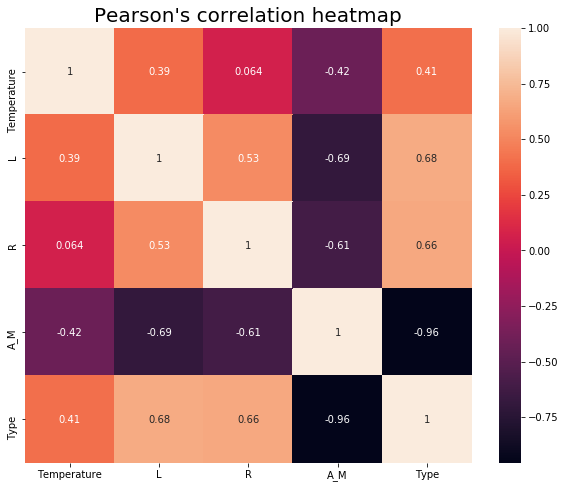

In [106]:
corr = df.corr()
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot=True)
plt.title("Pearson's correlation heatmap", fontsize=20)

In [107]:
corr.Type

Temperature    0.411129
L              0.676845
R              0.660975
A_M           -0.955276
Type           1.000000
Name: Type, dtype: float64

We can notice that except A_M all other features are positively correlated. Let plot the graph for visualization.

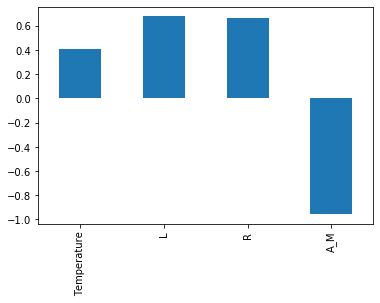

In [108]:
df.corr()['Type'][['Temperature', 'L', 'R', 'A_M']].plot.bar()

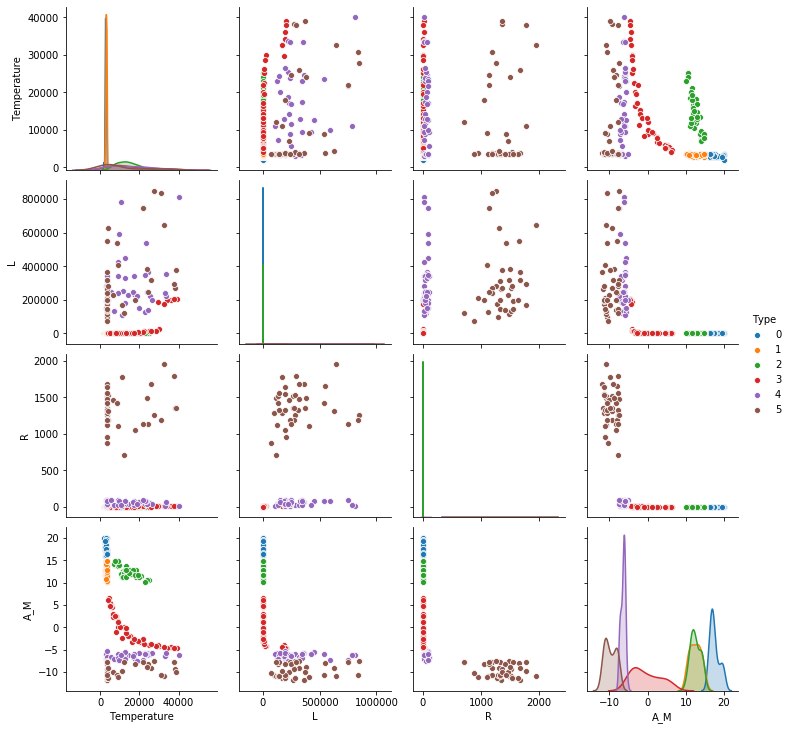

In [109]:
sb.pairplot(data=df,hue='Type')

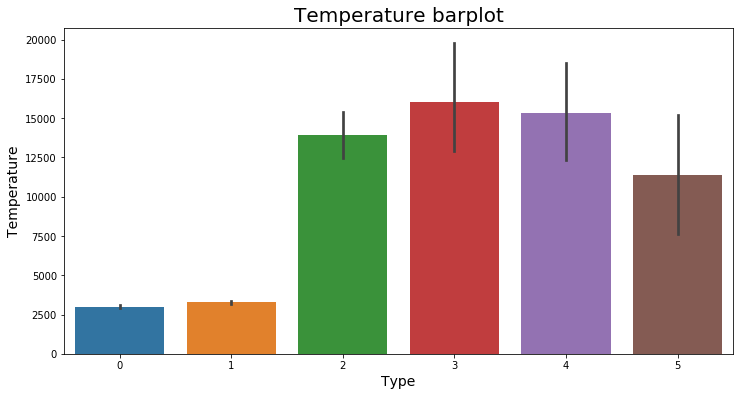

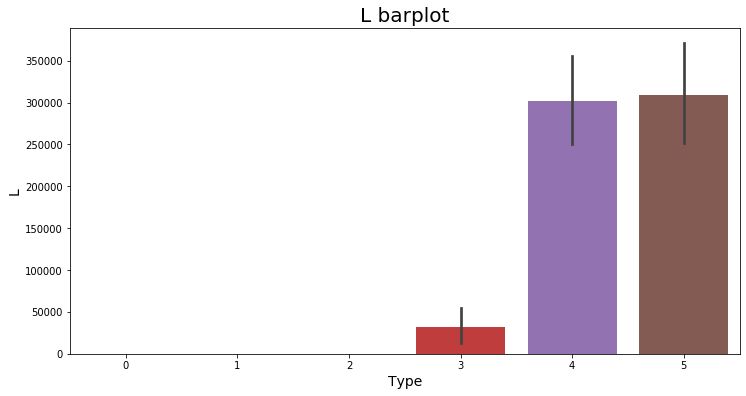

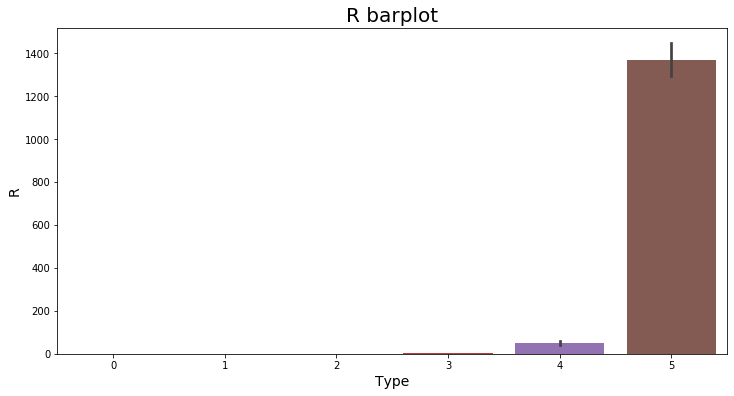

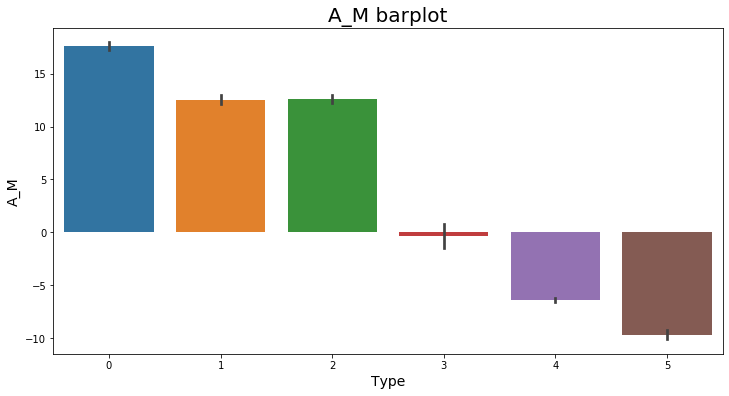

In [110]:
df_col = df.loc[:, ['Temperature', 'L', 'R', 'A_M']]
for col_nm in df_col:
    plt.figure(figsize=(12,6))
    sb.barplot(x=df['Type'], y=df_col[col_nm])
    plt.title(col_nm+' barplot',fontsize=20)
    plt.xlabel('Type', fontsize=14)
    plt.ylabel(col_nm, fontsize=14)
    plt.show()

From graph Type vs temperature it is clear that type 2, 3, 4, 5 has higher surface temperature than type 1 and 2 star.
From graph Type vs L shows that the luminousity of type 4, 5 star is far greater than rest.
In graph Type vs R, the type 5 star is far larger in size than the rest of the star.
Graph Type vs A_M, we can see the type 0, 1, 2 star have positive absolute magnitude ie they are less brighter as compared to type 4, 5 stars which have negative absolute magnitude.

Now let's plot boxplot to see how the stars are distributed according to their features.

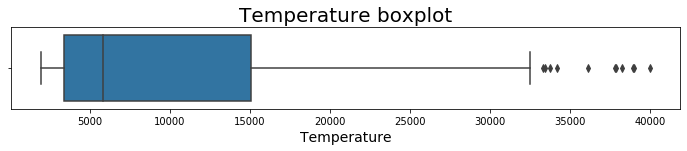

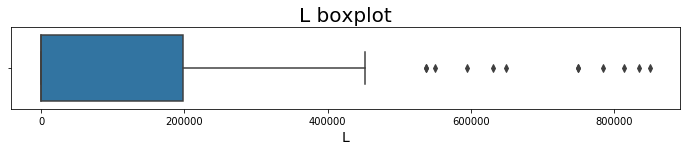

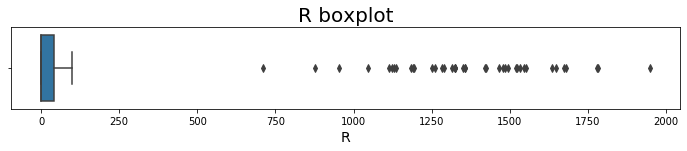

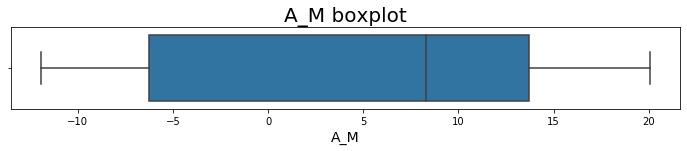

In [111]:
for col_nm in df_col:
    plt.figure(figsize=(12,1.5))
    sb.boxplot(x=df_col[col_nm])
    plt.title(col_nm+' boxplot',fontsize=20)
    plt.xlabel(col_nm, fontsize=14)
    plt.show()

Also boxplotting Temperature, L, R, A_M vs. Type to get some idea regarding the distribution of stars according to their Type.

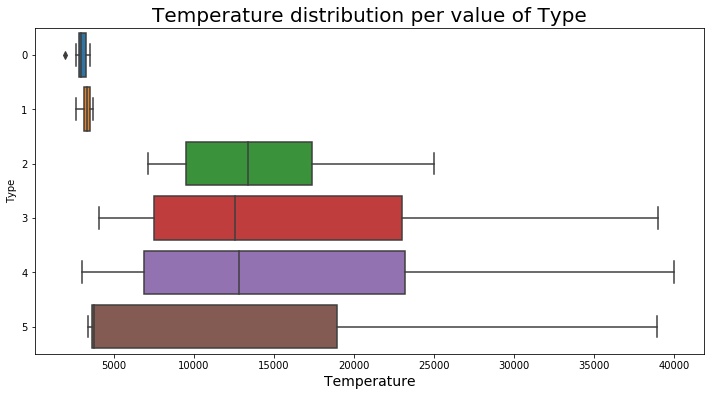

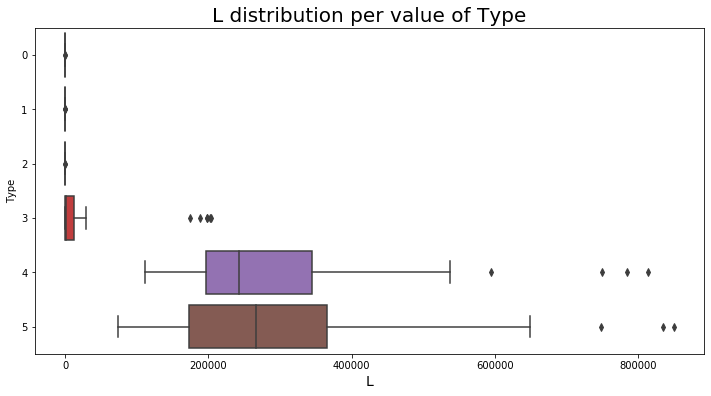

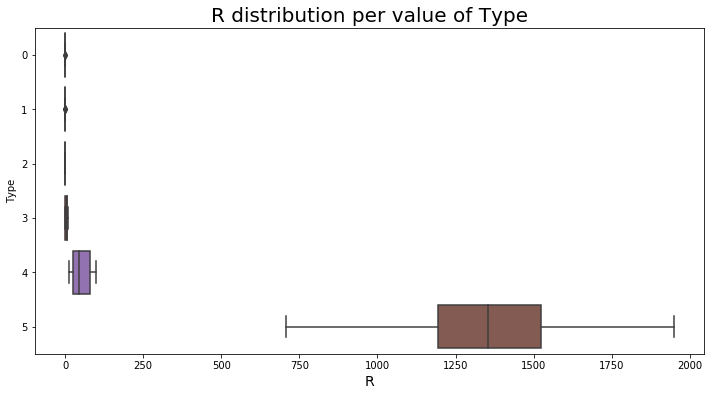

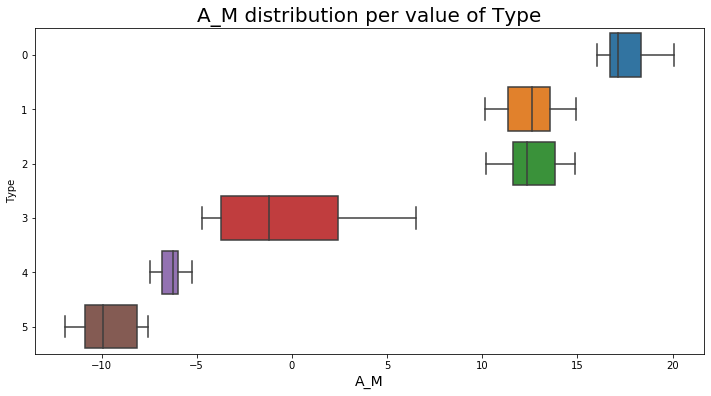

In [112]:
# Boxplots per target variable values

for col_nm in df_col:
    plt.figure(figsize=(12,6))
    sb.boxplot(data = df, x = df_col[col_nm], y ='Type', orient = 'h')
    plt.title(col_nm +' distribution per value of Type', fontsize = 20)
    plt.xlabel(col_nm, fontsize=14)
    plt.ylabel('Type')
    plt.show()

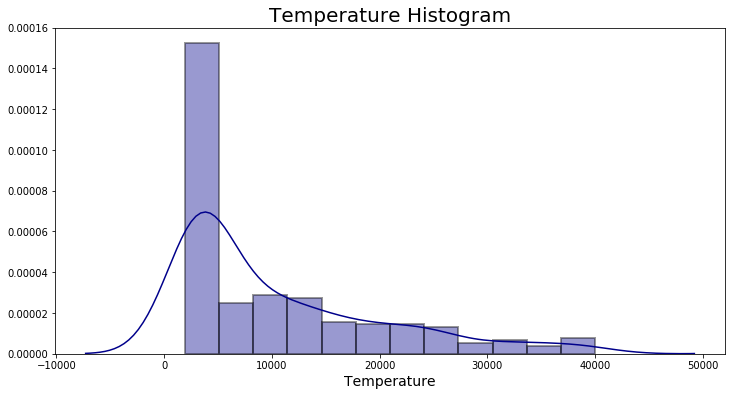

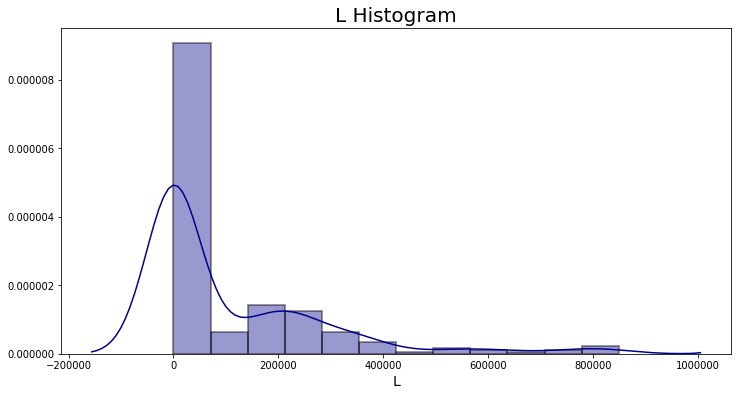

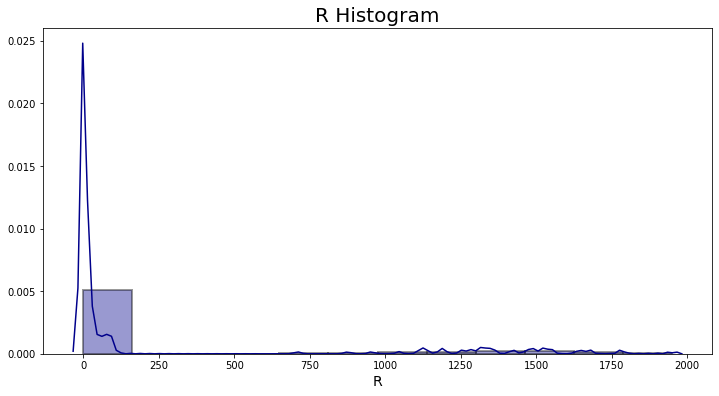

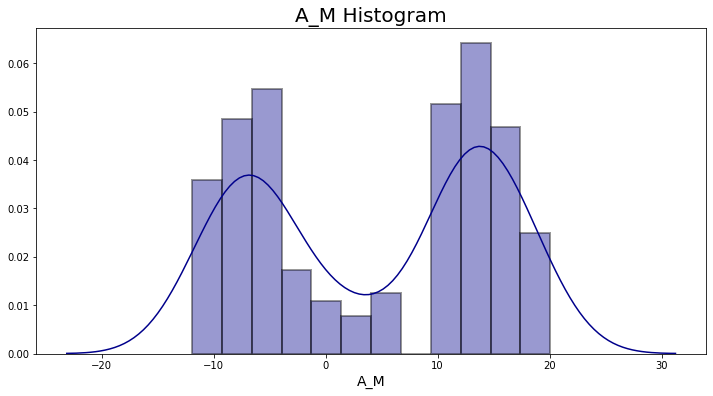

In [113]:
for col_nm in df_col:
    plt.figure(figsize=(12,6))
    sb.distplot(df_col[col_nm], hist=True, kde=True, bins=int(180/15), color='darkblue',
                hist_kws=dict(edgecolor='black', linewidth=2))
    plt.title(col_nm +' Histogram', fontsize = 20)
    plt.xlabel(col_nm, fontsize=14)
    plt.show()

Getting the count of all the type of colors present in the dataset.

In [114]:
df['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
Orange                  2
Whitish                 2
yellowish               2
Yellowish               1
Pale yellow orange      1
White-Yellow            1
Blue-White              1
Orange-Red              1
Name: Color, dtype: int64

We see there are different types of similar colors. We can group them together to a color to which they are strongly related. This will help to simplify our data. Let's do it.

In [115]:
x=['Blue-white','yellow-white','Blue White', 'Blue white', 'Yellowish White', 'white', 'Whitish', 'Blue-White', 'White-Yellow']
for i in x:
    df.loc[df['Color']==i, 'Color']='White'

In [116]:
x=['yellowish','Yellowish']
for i in x:
    df.loc[df['Color']==i, 'Color']='Yellow'

In [117]:
x=['Pale yellow orange','Orange-Red']
for i in x:
    df.loc[df['Color']==i, 'Color']='Orange'

In [118]:
df['Color'].value_counts()

Red       112
White      65
Blue       56
Orange      4
Yellow      3
Name: Color, dtype: int64

We grouped all the stars to five colors namely, 'Red', 'White', 'Blue', 'Orange', and 'Yellow'.

Now let's encode all the Color column and Spectral class name categorical data to numeric values.

In [119]:
from sklearn.preprocessing import LabelEncoder

df['Color'] = LabelEncoder().fit_transform(df['Color'])
df['Spectral_Class'] = LabelEncoder().fit_transform(df['Spectral_Class'])
print(df['Color'].unique())
print(df['Spectral_Class'].unique())

[2 3 1 0 4]
[5 1 0 2 6 4 3]


In [120]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,2,5,0
1,3042,0.000500,0.1542,16.60,2,5,0
2,2600,0.000300,0.1020,18.70,2,5,0
3,2800,0.000200,0.1600,16.65,2,5,0
4,1939,0.000138,0.1030,20.06,2,5,0


For training our model, we will be using Random Forest classifier and K Nearest Neighbor Classifier and compare the results.

In [121]:
X=df.drop('Type', axis=1)
Y=df['Type']

In [122]:
print(X.shape, Y.shape)

(240, 6) (240,)


In [123]:
# Using MinMaxScaler to scale the input data.

x_scaled = MinMaxScaler().fit_transform(X)
x_scaled

array([[2.96629095e-02, 2.73127546e-09, 8.29359490e-05, 8.76797999e-01,
        5.00000000e-01, 8.33333333e-01],
       [2.89797956e-02, 4.94455040e-10, 7.48271124e-05, 8.91807380e-01,
        5.00000000e-01, 8.33333333e-01],
       [1.73668585e-02, 2.59000259e-10, 4.80371586e-05, 9.57473421e-01,
        5.00000000e-01, 8.33333333e-01],
       ...,
       [1.81025196e-01, 6.32776483e-01, 7.30304200e-01, 3.72107567e-02,
        7.50000000e-01, 0.00000000e+00],
       [1.91692283e-01, 4.76725295e-01, 5.70693556e-01, 2.15759850e-02,
        7.50000000e-01, 0.00000000e+00],
       [9.44352487e-01, 3.47181606e-01, 9.15062503e-01, 1.28830519e-01,
        0.00000000e+00, 1.00000000e+00]])

We will be splitting the data into 70% train set and 30% test set.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.4, random_state=47)

In [125]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(144, 6) (144,) (96, 6) (96,)


In [126]:
# Creating a function for training the model and calculating metrics. 

def model_training(X_train, X_test, y_train, y_test, model):

    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_hat)
    cm = confusion_matrix(y_test, y_hat)
    c_report = classification_report(y_test, y_hat)
    precision = precision_score(y_test, y_hat, average='micro')
    recall = recall_score(y_test, y_hat, average='micro')
    f1 = f1_score(y_test, y_hat, average='micro')
    return accuracy, cm, precision, recall, f1, c_report

In [127]:
# Using RandomForestClassifier.

rfc = RandomForestClassifier(random_state=42, 
                                 n_estimators= 250,
                                 criterion= 'gini', 
                                 max_depth= 5, 
                                 max_features= 'log2',
                                 min_samples_leaf= 4,
                                 min_samples_split= 3,)

accuracy, cm, precision, recall, f1, c_report = model_training(X_train, X_test, y_train, y_test, rfc)

print('Accuracy :', accuracy)
print('--------------------------------------------')
print('Confusion Matrix :\n', cm)
print('--------------------------------------------')
print('Classification Report :\n', c_report)
print('--------------------------------------------')
print('Precision: %.3f ' % precision)
print('Recall: %.3f ' % recall)

print('F1 score: %.3f' % f1)

Accuracy : 1.0
--------------------------------------------
Confusion Matrix :
 [[19  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 12]]
--------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        12

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

--------------------------------------------
Precision: 1.000 
Recall: 1.000 
F1 score: 1.000


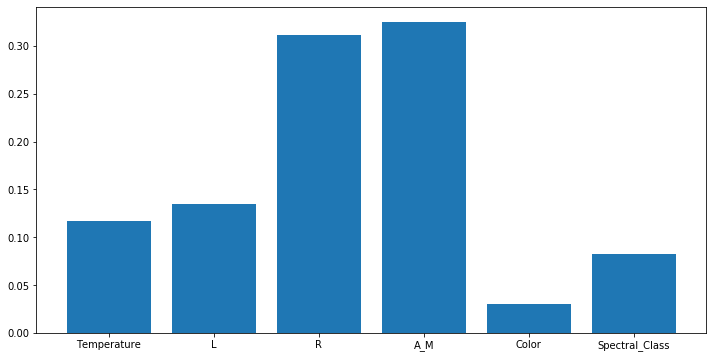

In [128]:
# Plotting the feature importance.

features = X.columns
imp = rfc.feature_importances_
plt.figure(figsize=(12,6))
plt.bar(features, imp)
plt.show()

From the above graph, it is visible that features R and A_M are most useful in predicting the target value.

In [129]:
knn = KNeighborsClassifier(n_neighbors=6, leaf_size=1, p=2)

accuracy, cm, precision, recall, f1, c_report = model_training(X_train, X_test, y_train, y_test, knn)

print('Accuracy :', accuracy)
print('--------------------------------------------')
print('Confusion Matrix :\n', cm)
print('--------------------------------------------')
print('Classification Report :\n', c_report)
print('--------------------------------------------')
print('Precision: %.3f ' % precision)
print('Recall: %.3f ' % recall)
print('F1 score: %.3f' % f1)

Accuracy : 0.9791666666666666
--------------------------------------------
Confusion Matrix :
 [[19  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  1  1 10]]
--------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       0.94      1.00      0.97        16
           4       0.94      1.00      0.97        15
           5       1.00      0.83      0.91        12

    accuracy                           0.98        96
   macro avg       0.98      0.97      0.97        96
weighted avg       0.98      0.98      0.98        96

--------------------------------------------
Precision: 0.979 
Recall: 0.979 
F1 score: 0.979


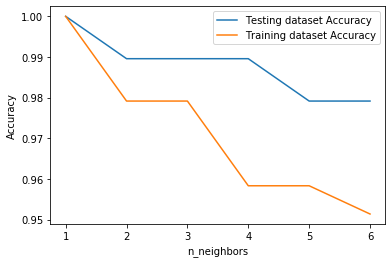

In [130]:
neighbors = np.arange(1, 7)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
 # Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Comparing the above two models, we got 100% accuracy for Random Forest Classifier and 97.9% for K Nearest Neighbors classifier. Thus, Random Forest Classifier is better in predicting the type of star than KNN Classifier.